In [41]:
import pandas as pd
import numpy as np


In [42]:
df = pd.read_csv("courses_5000_complete_dataset2.csv")
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (5000, 9)


,Title,Platform,Category,Price,Instructor,Rating,Learners,Duration_Hours,Difficulty
0,Online Course,Coursera,#NAME?,Free / Paid,Andrew Ng,5.0,392427,47,Advanced
1,Online Course,Coursera,#NAME?,Free / Paid,University Faculty,3.6,182946,50,Advanced
2,Online Course,Coursera,#NAME?,Free / Paid,Microsoft Learn,4.0,460957,40,Advanced
3,Online Course,Coursera,#NAME?,Free / Paid,Andrew Ng,4.3,412367,27,Intermediate
4,Online Course,Coursera,#NAME?,Free / Paid,Microsoft Learn,3.8,383496,14,Intermediate


In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           5000 non-null   object 
 1   Platform        5000 non-null   object 
 2   Category        5000 non-null   object 
 3   Price           5000 non-null   object 
 4   Instructor      5000 non-null   object 
 5   Rating          5000 non-null   float64
 6   Learners        5000 non-null   int64  
 7   Duration_Hours  5000 non-null   int64  
 8   Difficulty      5000 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 351.7+ KB


In [44]:
df.isnull().sum()

Title             0
Platform          0
Category          0
Price             0
Instructor        0
Rating            0
Learners          0
Duration_Hours    0
Difficulty        0
dtype: int64

In [45]:
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)


After removing duplicates: (5000, 9)


In [46]:
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")
df["Rating"].fillna(df["Rating"].mean(), inplace=True)

df["Learners"] = pd.to_numeric(df["Learners"], errors="coerce")
df["Learners"].fillna(df["Learners"].median(), inplace=True)

df["Duration_Hours"] = pd.to_numeric(df["Duration_Hours"], errors="coerce")
df["Duration_Hours"].fillna(df["Duration_Hours"].median(), inplace=True)

df["Instructor"].fillna("Unknown Instructor", inplace=True)

/tmp/ipykernel_132/3529045276.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Rating"].fillna(df["Rating"].mean(), inplace=True)
/tmp/ipykernel_132/3529045276.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [47]:
def difficulty_level(hours):
    if hours <= 10:
        return "Beginner"
    elif hours <= 30:
        return "Intermediate"
    else:
        return "Advanced"

df["Difficulty"] = df["Duration_Hours"].apply(difficulty_level)

In [48]:
df.head(5)

,Title,Platform,Category,Price,Instructor,Rating,Learners,Duration_Hours,Difficulty
0,Online Course,Coursera,#NAME?,Free / Paid,Andrew Ng,5.0,392427,47,Advanced
1,Online Course,Coursera,#NAME?,Free / Paid,University Faculty,3.6,182946,50,Advanced
2,Online Course,Coursera,#NAME?,Free / Paid,Microsoft Learn,4.0,460957,40,Advanced
3,Online Course,Coursera,#NAME?,Free / Paid,Andrew Ng,4.3,412367,27,Intermediate
4,Online Course,Coursera,#NAME?,Free / Paid,Microsoft Learn,3.8,383496,14,Intermediate


In [49]:
df["Price_Type"] = df["Price"].apply(lambda x: 0 if "Free" in str(x) else 1)


In [50]:
df["Instructor_Popularity"] = df.groupby("Instructor")["Learners"].transform("mean")


In [51]:
df.head(5)

,Title,Platform,Category,Price,Instructor,Rating,Learners,Duration_Hours,Difficulty,Price_Type,Instructor_Popularity
0,Online Course,Coursera,#NAME?,Free / Paid,Andrew Ng,5.0,392427,47,Advanced,0,148393.643657
1,Online Course,Coursera,#NAME?,Free / Paid,University Faculty,3.6,182946,50,Advanced,0,123908.443674
2,Online Course,Coursera,#NAME?,Free / Paid,Microsoft Learn,4.0,460957,40,Advanced,0,147259.490637
3,Online Course,Coursera,#NAME?,Free / Paid,Andrew Ng,4.3,412367,27,Intermediate,0,148393.643657
4,Online Course,Coursera,#NAME?,Free / Paid,Microsoft Learn,3.8,383496,14,Intermediate,0,147259.490637


In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_columns = ["Platform", "Category", "Instructor", "Difficulty"]

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])


In [53]:
df["Success_Score"] = (
    (df["Rating"] * 0.6) +
    (df["Learners"] / df["Learners"].max()) * 4
)


In [54]:
df.head(5)


,Title,Platform,Category,Price,Instructor,Rating,Learners,Duration_Hours,Difficulty,Price_Type,Instructor_Popularity,Success_Score
0,Online Course,0,0,Free / Paid,0,5.0,392427,47,0,0,148393.643657,6.141024
1,Online Course,0,0,Free / Paid,8,3.6,182946,50,0,0,123908.443674,3.624318
2,Online Course,0,0,Free / Paid,7,4.0,460957,40,0,0,147259.490637,6.089545
3,Online Course,0,0,Free / Paid,0,4.3,412367,27,2,0,148393.643657,5.880626
4,Online Course,0,0,Free / Paid,7,3.8,383496,14,2,0,147259.490637,5.349540


In [55]:
df["Success"] = df["Success_Score"].apply(
    lambda x: 1 if x >= df["Success_Score"].median() else 0
)


In [56]:
X = df.drop(
    ["Title", "Price", "Success", "Success_Score"],
    axis=1
)

y = df["Success"]

print("Feature Shape:", X.shape)
print("Target Shape:", y.shape)


Feature Shape: (5000, 9)
Target Shape: (5000,)


In [57]:
df.head(5)

,Title,Platform,Category,Price,Instructor,Rating,Learners,Duration_Hours,Difficulty,Price_Type,Instructor_Popularity,Success_Score,Success
0,Online Course,0,0,Free / Paid,0,5.0,392427,47,0,0,148393.643657,6.141024,1
1,Online Course,0,0,Free / Paid,8,3.6,182946,50,0,0,123908.443674,3.624318,1
2,Online Course,0,0,Free / Paid,7,4.0,460957,40,0,0,147259.490637,6.089545,1
3,Online Course,0,0,Free / Paid,0,4.3,412367,27,2,0,148393.643657,5.880626,1
4,Online Course,0,0,Free / Paid,7,3.8,383496,14,2,0,147259.490637,5.349540,1


In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
df.head(5)

,Title,Platform,Category,Price,Instructor,Rating,Learners,Duration_Hours,Difficulty,Price_Type,Instructor_Popularity,Success_Score,Success
0,Online Course,0,0,Free / Paid,0,5.0,392427,47,0,0,148393.643657,6.141024,1
1,Online Course,0,0,Free / Paid,8,3.6,182946,50,0,0,123908.443674,3.624318,1
2,Online Course,0,0,Free / Paid,7,4.0,460957,40,0,0,147259.490637,6.089545,1
3,Online Course,0,0,Free / Paid,0,4.3,412367,27,2,0,148393.643657,5.880626,1
4,Online Course,0,0,Free / Paid,7,3.8,383496,14,2,0,147259.490637,5.349540,1


In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [60]:
df.to_csv("courses_5000_processed.csv", index=False)
print("✅ Processed dataset saved successfully")


✅ Processed dataset saved successfully


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("courses_5000_processed.csv")

# Basic info
print(df.shape)
df.head()


(5000, 13)


,Title,Platform,Category,Price,Instructor,Rating,Learners,Duration_Hours,Difficulty,Price_Type,Instructor_Popularity,Success_Score,Success
0,Online Course,0,0,Free / Paid,0,5.0,392427,47,0,0,148393.643657,6.141024,1
1,Online Course,0,0,Free / Paid,8,3.6,182946,50,0,0,123908.443674,3.624318,1
2,Online Course,0,0,Free / Paid,7,4.0,460957,40,0,0,147259.490637,6.089545,1
3,Online Course,0,0,Free / Paid,0,4.3,412367,27,2,0,148393.643657,5.880626,1
4,Online Course,0,0,Free / Paid,7,3.8,383496,14,2,0,147259.490637,5.349540,1


In [62]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  5000 non-null   object 
 1   Platform               5000 non-null   int64  
 2   Category               5000 non-null   int64  
 3   Price                  5000 non-null   object 
 4   Instructor             5000 non-null   int64  
 5   Rating                 5000 non-null   float64
 6   Learners               5000 non-null   int64  
 7   Duration_Hours         5000 non-null   int64  
 8   Difficulty             5000 non-null   int64  
 9   Price_Type             5000 non-null   int64  
 10  Instructor_Popularity  5000 non-null   float64
 11  Success_Score          5000 non-null   float64
 12  Success                5000 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 507.9+ KB


In [63]:
df.describe()


,Platform,Category,Instructor,Rating,Learners,Duration_Hours,Difficulty,Price_Type,Instructor_Popularity,Success_Score,Success
count,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.0,5000.000000,5000.000000,5000.00000
mean,0.0,2490.509000,4.063000,4.421377,136867.777600,32.418800,0.82540,0.0,136867.777600,3.748329,0.50000
std,0.0,1443.504453,2.567947,0.414738,162197.996114,16.156782,0.92924,0.0,7797.307414,1.228563,0.50005
min,0.0,0.000000,0.000000,3.000000,10.000000,5.000000,0.00000,0.0,123908.443674,1.800160,0.00000
25%,0.0,1240.750000,2.000000,4.100000,161.750000,18.000000,0.00000,0.0,132676.739044,2.816059,0.00000
50%,0.0,2490.500000,4.000000,4.547532,47478.000000,32.000000,0.00000,0.0,135456.048527,2.998177,0.50000
75%,0.0,3740.250000,6.000000,4.756114,271765.750000,46.000000,2.00000,0.0,145197.637011,4.686024,1.00000
max,0.0,4990.000000,8.000000,5.000000,499744.000000,60.000000,2.00000,0.0,148393.643657,6.954705,1.00000


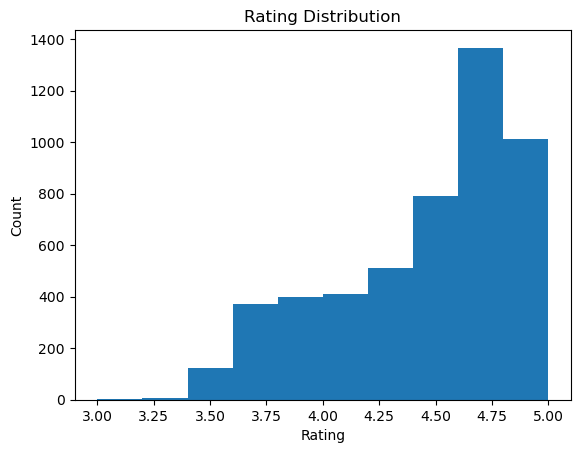

In [64]:
plt.figure()
plt.hist(df["Rating"], bins=10)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


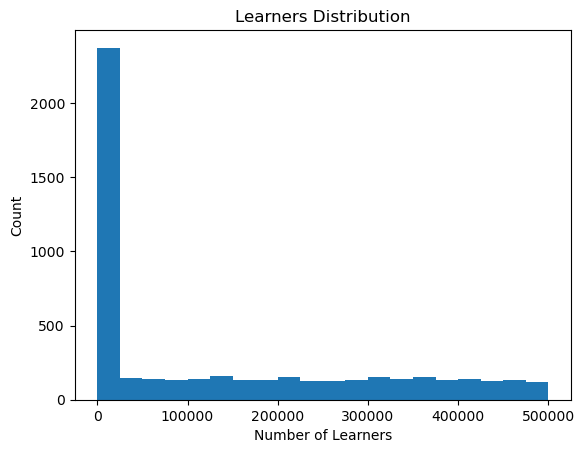

In [65]:
plt.figure()
plt.hist(df["Learners"], bins=20)
plt.title("Learners Distribution")
plt.xlabel("Number of Learners")
plt.ylabel("Count")
plt.show()


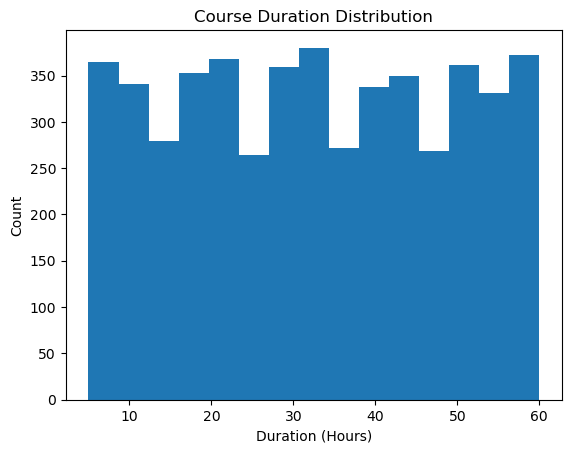

In [66]:
plt.figure()
plt.hist(df["Duration_Hours"], bins=15)
plt.title("Course Duration Distribution")
plt.xlabel("Duration (Hours)")
plt.ylabel("Count")
plt.show()


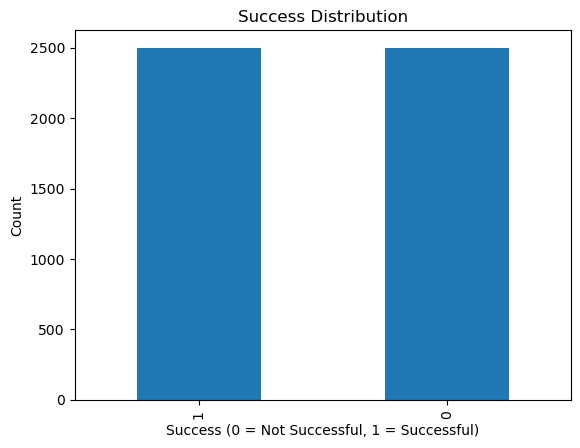

In [67]:
df["Success"].value_counts().plot(kind="bar")
plt.title("Success Distribution")
plt.xlabel("Success (0 = Not Successful, 1 = Successful)")
plt.ylabel("Count")
plt.show()


In [68]:
%matplotlib inline


In [69]:
print(df.head())
print(df["Rating"].head())
print(df["Learners"].head())


           Title  Platform  Category        Price  Instructor  Rating  \
0  Online Course         0         0  Free / Paid           0     5.0   
1  Online Course         0         0  Free / Paid           8     3.6   
2  Online Course         0         0  Free / Paid           7     4.0   
3  Online Course         0         0  Free / Paid           0     4.3   
4  Online Course         0         0  Free / Paid           7     3.8   

   Learners  Duration_Hours  Difficulty  Price_Type  Instructor_Popularity  \
0    392427              47           0           0          148393.643657   
1    182946              50           0           0          123908.443674   
2    460957              40           0           0          147259.490637   
3    412367              27           2           0          148393.643657   
4    383496              14           2           0          147259.490637   

   Success_Score  Success  
0       6.141024        1  
1       3.624318        1  
2       

In [70]:
print(df.columns)


Index(['Title', 'Platform', 'Category', 'Price', 'Instructor', 'Rating',
       'Learners', 'Duration_Hours', 'Difficulty', 'Price_Type',
       'Instructor_Popularity', 'Success_Score', 'Success'],
      dtype='object')


In [71]:
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")
df["Learners"] = pd.to_numeric(df["Learners"], errors="coerce")


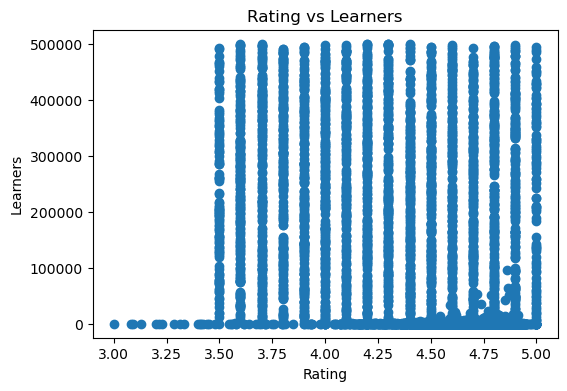

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df["Rating"], df["Learners"])
plt.title("Rating vs Learners")
plt.xlabel("Rating")
plt.ylabel("Learners")
plt.show()


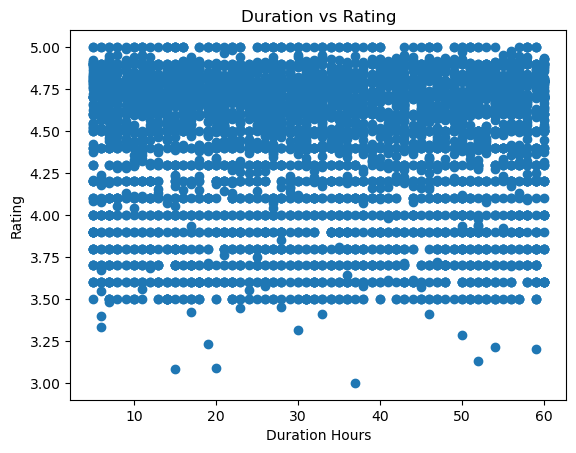

In [73]:
plt.figure()
plt.scatter(df["Duration_Hours"], df["Rating"])
plt.title("Duration vs Rating")
plt.xlabel("Duration Hours")
plt.ylabel("Rating")
plt.show()


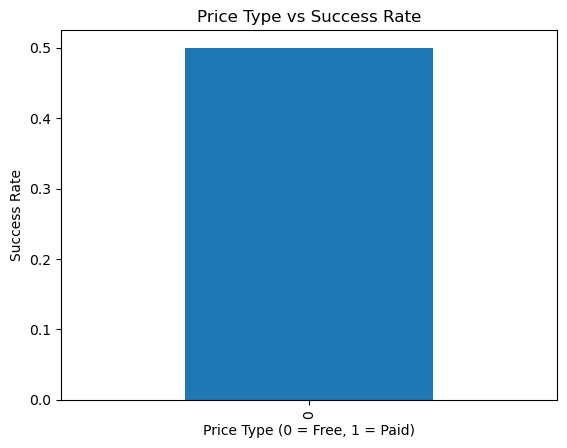

In [74]:
df.groupby("Price_Type")["Success"].mean().plot(kind="bar")
plt.title("Price Type vs Success Rate")
plt.xlabel("Price Type (0 = Free, 1 = Paid)")
plt.ylabel("Success Rate")
plt.show()



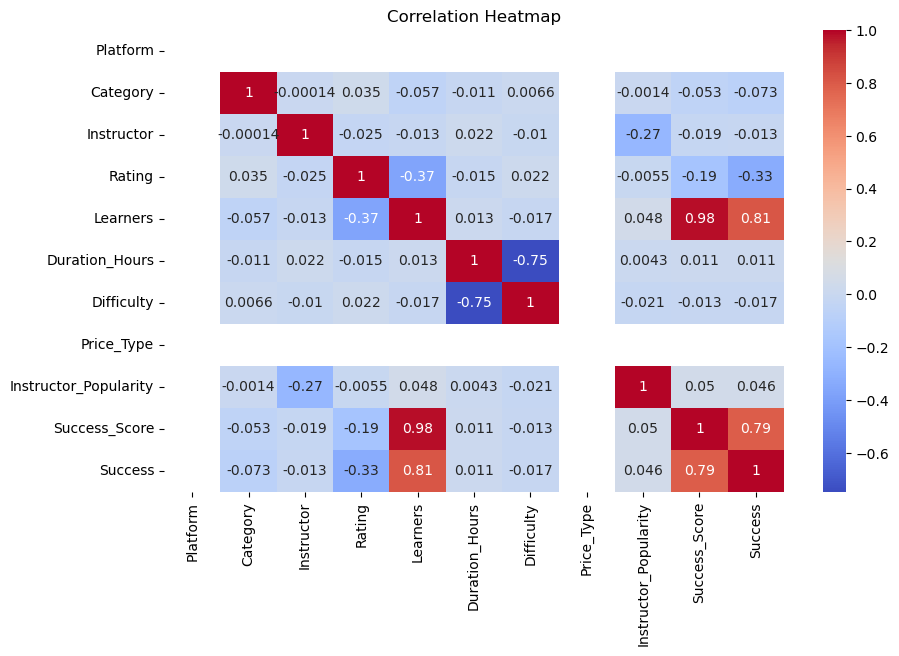

In [75]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
corr = numeric_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [123]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import r2_score, mean_squared_error


In [124]:
df = pd.read_csv("courses_5000_processed.csv")
df.head()


,Title,Platform,Category,Price,Instructor,Rating,Learners,Duration_Hours,Difficulty,Price_Type,Instructor_Popularity,Success_Score,Success
0,Online Course,0,0,Free / Paid,0,5.0,392427,47,0,0,148393.643657,6.141024,1
1,Online Course,0,0,Free / Paid,8,3.6,182946,50,0,0,123908.443674,3.624318,1
2,Online Course,0,0,Free / Paid,7,4.0,460957,40,0,0,147259.490637,6.089545,1
3,Online Course,0,0,Free / Paid,0,4.3,412367,27,2,0,148393.643657,5.880626,1
4,Online Course,0,0,Free / Paid,7,3.8,383496,14,2,0,147259.490637,5.349540,1


In [156]:
# -------------------------
# 1. Import libraries
# -------------------------
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -------------------------
# 2. Load dataset
# -------------------------
df = pd.read_csv("courses_5000_processed.csv")

# -------------------------
# 3. Feature selection
# -------------------------
X = df[["Learners", "Rating", "Duration_Hours", "Difficulty"]]
y = df["Success_Score"]

# -------------------------
# 4. Train-test split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------
# 5. Define models
# -------------------------
models = {
    "Ridge Regression": Ridge(alpha=10.0),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "SVR": SVR(kernel="rbf", C=10, epsilon=0.1),
    "Random Forest": RandomForestRegressor(
        n_estimators=200,
        max_depth=8,
        min_samples_split=10,
        random_state=42
    )
}

# -------------------------
# 6. Train, predict, evaluate
# -------------------------
results = []

for name, model in models.items():
    if name in ["Ridge Regression", "ElasticNet Regression", "SVR"]:
        pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("model", model)
        ])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, rmse, r2])

# -------------------------
# 7. Results table
# -------------------------
results_df = pd.DataFrame(
    results,
    columns=["Model", "MAE", "RMSE", "R2 Score"]
)

print(results_df)


                   Model       MAE      RMSE  R2 Score
0       Ridge Regression  0.003111  0.003869  0.999990
1  ElasticNet Regression  0.115473  0.153193  0.984961
2                    SVR  0.048150  0.055862  0.998000
3          Random Forest  0.018046  0.027105  0.999529


In [162]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import pandas as pd

# Load your dataset
df = pd.read_csv("courses_5000_processed.csv")

# Features and target
X = df[["Learners", "Rating", "Duration_Hours", "Difficulty"]]
y = df["Success_Score"]

# Create and fit scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Train Ridge Regression
ridge_model = Ridge(alpha=10.0)
ridge_model.fit(X_scaled, y)

# Save Ridge model
with open("ridge_model.pkl", "wb") as f:
    pickle.dump(ridge_model, f)

print("scaler.pkl and ridge_model.pkl created successfully!")


scaler.pkl and ridge_model.pkl created successfully!
